<img src="https://1000logos.net/wp-content/uploads/2017/11/Zillow-Logo.png" title="Zillow Logo"/>

***

- imports that we will be using for this data set

In [1]:
# fetches the data
import acquire
# credentials file to access the data
import env
# Imports functions necessary to run visuals and hides unnecessary code
import wrangle

# coding 
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

***

Fips dictionary:
- 6037.0 = Los Angeles,CA
- 6059.0 = Orange,CA
- 6111.0 = Ventura,CA

# <span style="color:blue">Plan</span>
- Acquire Data
- Clean and Prep the Data
- Explore the features of the Zillow data
- Evaluate Data
- Test Data

# <span style="color:blue">Acquiring Data</span>

In [2]:
# importing and aquiring data set
df = acquire.get_zillow_data()

### - Summary

In [3]:
# summary function for DataFrame
wrangle.summarize(df)

--- Shape: (71858, 69)
--- Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71858 entries, 0 to 71857
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         71858 non-null  float64
 1   parcelid                      71858 non-null  int64  
 2   storytypeid                   47 non-null     float64
 3   typeconstructiontypeid        223 non-null    float64
 4   heatingorsystemtypeid         46680 non-null  float64
 5   buildingclasstypeid           0 non-null      float64
 6   architecturalstyletypeid      207 non-null    float64
 7   airconditioningtypeid         23069 non-null  float64
 8   id                            71858 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   71858 non-null  float64
 11  bedroomcnt                    71858 non-null  float64
 12  buildingqualitytypeid      

nulls by row: n_missing  percent_missing
23         0.333333               2
24         0.347826              13
25         0.362319              24
26         0.376812              66
27         0.391304             312
28         0.405797             453
29         0.420290            5161
30         0.434783            3242
31         0.449275            9185
32         0.463768           11699
33         0.478261           14057
34         0.492754           12672
35         0.507246            4015
36         0.521739            5107
37         0.536232            3387
38         0.550725            1892
39         0.565217             240
40         0.579710             172
41         0.594203              13
42         0.608696               9
43         0.623188              13
44         0.637681              71
45         0.652174              45
46         0.666667               4
47         0.681159               2
48         0.695652               2
dtype: int64
None None 

***

# <span style="color:blue">Preparing & Cleaning Data</span>
- all these functions will be found in the explore.py file

###  What percentage of data is missing per column?

In [4]:
#looking at percentage of null values by column
wrangle.nulls_by_columns(df).sort_values(by= 'percent', ascending=False)

,count,percent
buildingclasstypeid,71858,1.000000
buildingclassdesc,71858,1.000000
finishedsquarefeet13,71856,0.999972
finishedsquarefeet15,71847,0.999847
storydesc,71811,0.999346
basementsqft,71811,0.999346
storytypeid,71811,0.999346
yardbuildingsqft26,71788,0.999026
finishedsquarefeet6,71692,0.997690
fireplaceflag,71686,0.997606


### Takeaways:

- we can see that there is a large percentage of information missing in alot of the columns (ranging from column regionidneighborhood with %60 data missing to buildingclasstypeid with %100 of the data missing.

### Functions to clean data:

- lets build a function to address the columns with large percentage of missing data.

In [5]:
# this function eliminates any rows with a null value over 50 percent data 

"this can be found in my wrangle.py folder"

def handle_missing_values(df, prop_required_column, prop_required_row):
    n_required_column = round(df.shape[0] * prop_required_column)
    n_required_row = round(df.shape[1] * prop_required_row)
    df = df.dropna(axis=0, thresh=n_required_row)
    df = df.dropna(axis=1, thresh=n_required_column)
    return df

print ('Before dropping nulls, %d rows, %d cols' % df.shape)
df = handle_missing_values(df, prop_required_column=.5, prop_required_row=.5)
print('After dropping nulls. %d rows. %d cols' % df.shape)

Before dropping nulls, 71858 rows, 69 cols
After dropping nulls. 60901 rows. 35 cols


## Takeaways
- Before dropping nulls, we had (71858 rows, 69 cols).
- After dropping nulls, we ended with (60901 rows, 35 cols).

### Lets see what were left with

In [6]:
# a view a how many null values exist in each column
wrangle.nulls_by_columns(df).sort_values(by= 'percent', ascending=False)

,count,percent
buildingqualitytypeid,16146,0.265119
propertyzoningdesc,15799,0.259421
unitcnt,15792,0.259306
heatingorsystemtypeid,14483,0.237812
heatingorsystemdesc,14483,0.237812
lotsizesquarefeet,3087,0.050689
regionidcity,1015,0.016666
censustractandblock,105,0.001724
structuretaxvaluedollarcnt,62,0.001018
finishedsquarefeet12,36,0.000591


In [7]:
df.columns

Index(['propertylandusetypeid', 'parcelid', 'heatingorsystemtypeid', 'id',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'id.1',
       'logerror', 'transactiondate', 'heatingorsystemdesc',
       'propertylandusedesc'],
      dtype='object')

### Lets adress the rest of the  null values

In [8]:
    # changing na values in heatingorsystemtypeid to '0'
df['heatingorsystemtypeid'] = df['heatingorsystemtypeid'].replace(np.nan, 0)

    # replacing na values in heatingorsystemdesc to 'none' to have the data matching on top
df['heatingorsystemdesc'] = df['heatingorsystemdesc'].replace(np.nan, 'none')

    # filling in propertyzoningdesc missing values with 'non-zoned'
df['propertyzoningdesc'] = df['propertyzoningdesc'].replace(np.nan, 'non-zoned')

    # filling in missing value for buildingqualitytypeid with '0'
df['buildingqualitytypeid'] = df['buildingqualitytypeid'].replace(np.nan, 0)

    # replacing unitcnt values that are nulls into '000' values
df['unitcnt'] = df['unitcnt'].replace(np.nan, 000)

    #dropping remaning null values that are not of major significance, under 2 thousand rows 
df = df.dropna()

***

### columns to remove:(column, reason for removal)
removing 
- (id, id.1, parcelid,'propertylandusetypeid','buildingqualitytypeid'), id is not necessary for our algorithms and will confuse any models from here on forward.
- (fullbathcnt,calculatedbathnbr,roomcnt),  any room room count other the bedroomcnt or bathroomcnt is not necessary considering that they return similar information if not combined info.
- (propertyzoningdesc,rawcensustractandblock,regionidcounty,censustractandblock), considering that fips is being kept for region identification purposes, these columns are not necessary.
- (assessmentyear, landtaxvaluedollarcnt, taxamount, transactiondate), considering that we have already filtered out the data to only return back information for the year 2017, and are keeping taxvaluedollarcnt, these columns are not necessary because this information can be obtained through the data that we will be keeping.
- (heatingorsystemdesc,finishedsquarefeet12,propertylandusedesc,'propertycountylandusecode','unitcnt'), calculatedfinishedsquarefeet already covers this info and heatingorsystemid already identifies this information numerically.

In [9]:
# columns to be removed from dataset
def drop_columns(df):
    df = df.drop(columns=['buildingqualitytypeid','id','parcelid','calculatedbathnbr','propertylandusetypeid','fullbathcnt','propertyzoningdesc','rawcensustractandblock','regionidcounty',
    'roomcnt','structuretaxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount','censustractandblock',
    'id.1','transactiondate','heatingorsystemdesc','finishedsquarefeet12','propertylandusedesc','propertycountylandusecode','unitcnt'])
    return df
drop_columns(df)

,heatingorsystemtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror
1,0.0,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,0.055619
2,0.0,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,0.005383
3,2.0,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,-0.103410
4,2.0,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,12447.0,96451.0,1964.0,119407.0,0.006940
5,0.0,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,51239.0,97091.0,1982.0,331064.0,-0.020526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71853,2.0,2.0,2.0,1286.0,6037.0,34245368.0,-118282383.0,47405.0,12447.0,96284.0,1940.0,354621.0,0.020615
71854,0.0,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,97116.0,1964.0,67205.0,0.013209
71855,2.0,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,96480.0,1954.0,49546.0,0.037129
71856,2.0,2.0,3.0,1762.0,6037.0,33937685.0,-117996709.0,6347.0,14634.0,96171.0,1955.0,522000.0,0.007204


In [10]:
# assigning clean data set as df
df = drop_columns(df)
df

,heatingorsystemtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror
1,0.0,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,0.055619
2,0.0,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,0.005383
3,2.0,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,-0.103410
4,2.0,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,12447.0,96451.0,1964.0,119407.0,0.006940
5,0.0,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,51239.0,97091.0,1982.0,331064.0,-0.020526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71853,2.0,2.0,2.0,1286.0,6037.0,34245368.0,-118282383.0,47405.0,12447.0,96284.0,1940.0,354621.0,0.020615
71854,0.0,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,97116.0,1964.0,67205.0,0.013209
71855,2.0,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,96480.0,1954.0,49546.0,0.037129
71856,2.0,2.0,3.0,1762.0,6037.0,33937685.0,-117996709.0,6347.0,14634.0,96171.0,1955.0,522000.0,0.007204


In [11]:
# seeing what the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56695 entries, 1 to 71857
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   heatingorsystemtypeid         56695 non-null  float64
 1   bathroomcnt                   56695 non-null  float64
 2   bedroomcnt                    56695 non-null  float64
 3   calculatedfinishedsquarefeet  56695 non-null  float64
 4   fips                          56695 non-null  float64
 5   latitude                      56695 non-null  float64
 6   longitude                     56695 non-null  float64
 7   lotsizesquarefeet             56695 non-null  float64
 8   regionidcity                  56695 non-null  float64
 9   regionidzip                   56695 non-null  float64
 10  yearbuilt                     56695 non-null  float64
 11  taxvaluedollarcnt             56695 non-null  float64
 12  logerror                      56695 non-null  float64
dtypes

In [12]:
wrangle.nulls_by_columns(df).sort_values(by= 'percent', ascending=False)

,count,percent
heatingorsystemtypeid,0,0.0
bathroomcnt,0,0.0
bedroomcnt,0,0.0
calculatedfinishedsquarefeet,0,0.0
fips,0,0.0
latitude,0,0.0
longitude,0,0.0
lotsizesquarefeet,0,0.0
regionidcity,0,0.0
regionidzip,0,0.0


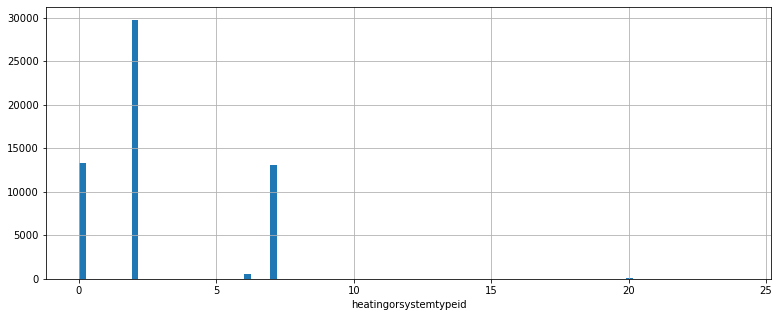

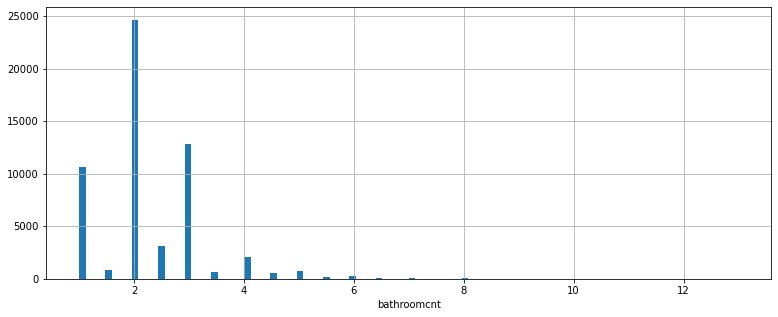

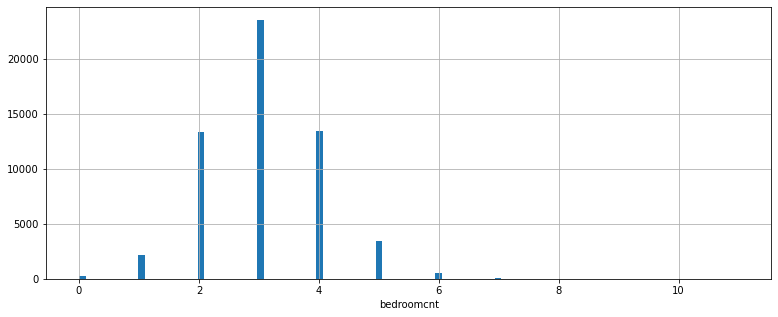

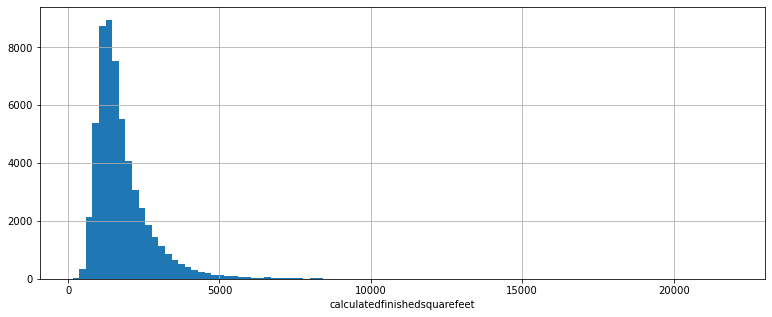

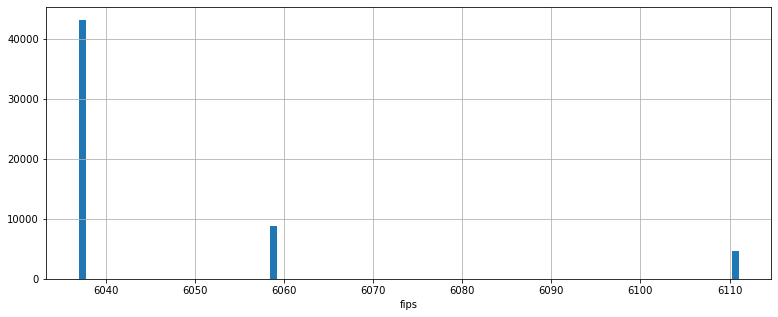

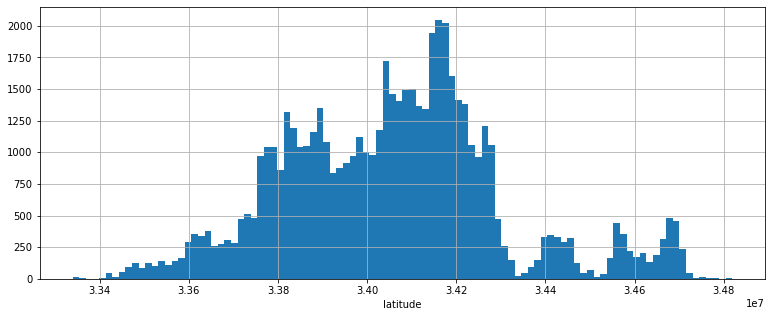

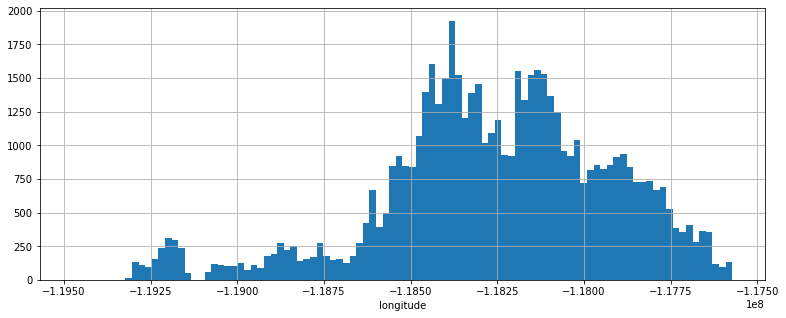

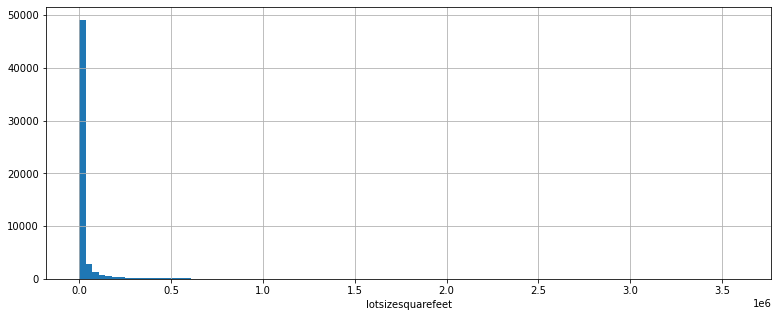

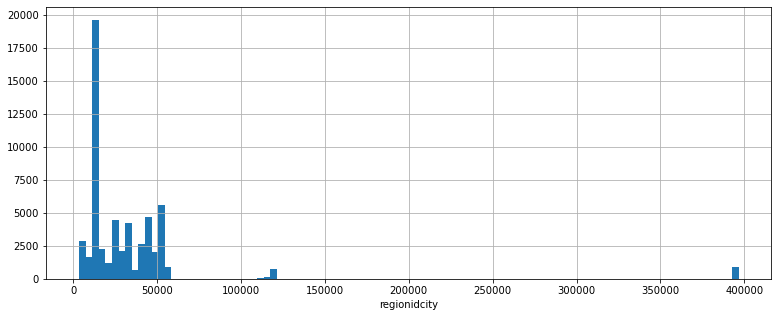

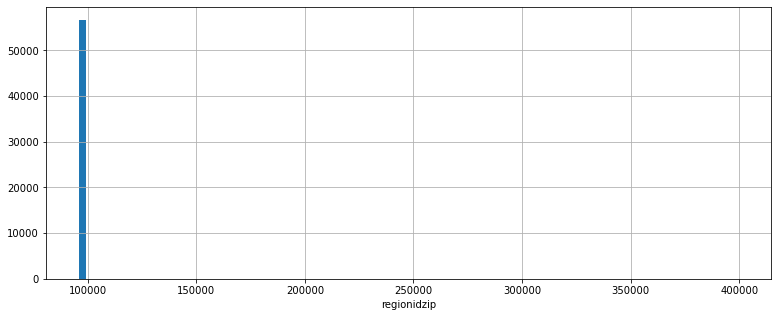

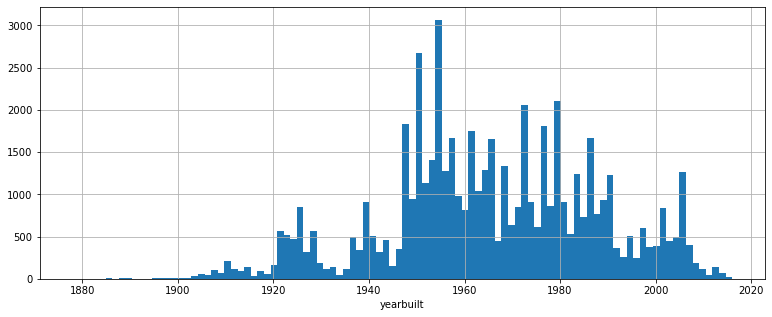

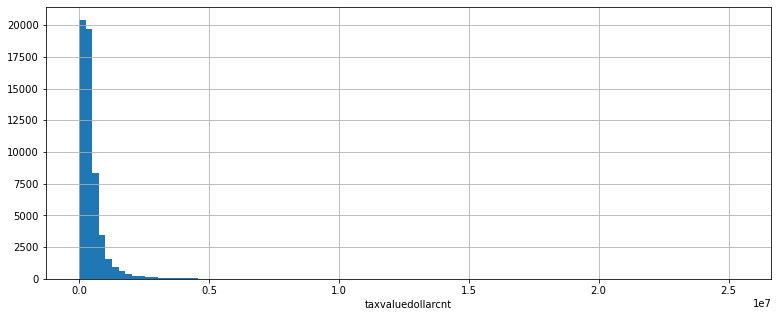

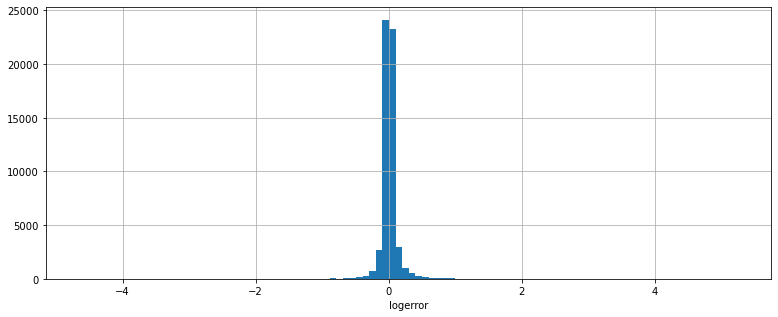

In [13]:
for column in ['heatingorsystemtypeid', 'bathroomcnt',
       'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet',
       'regionidcity', 'regionidzip',
       'yearbuilt', 'taxvaluedollarcnt', 'logerror']:
    plt.figure(figsize=(13,5))
    df[column].hist(bins=100)
    plt.xlabel(column)
    plt.show()

### Visualize columns to identify outliers

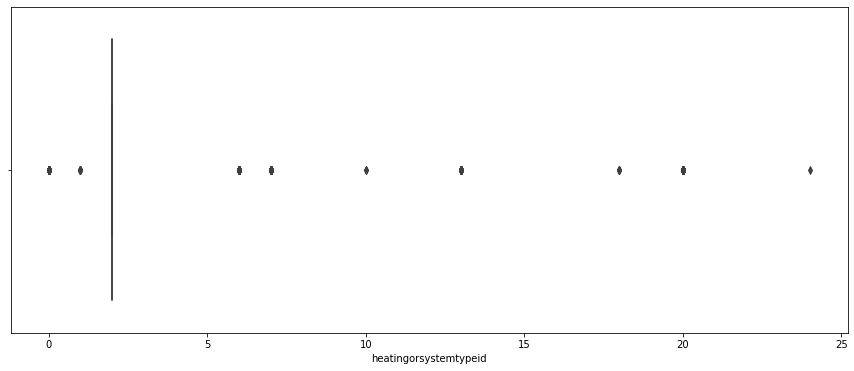

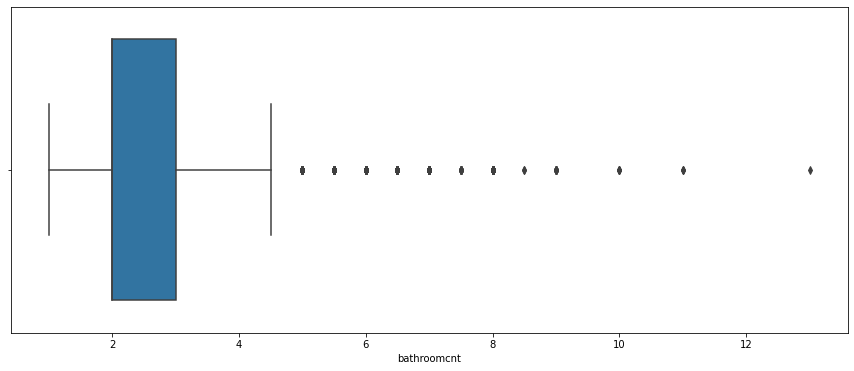

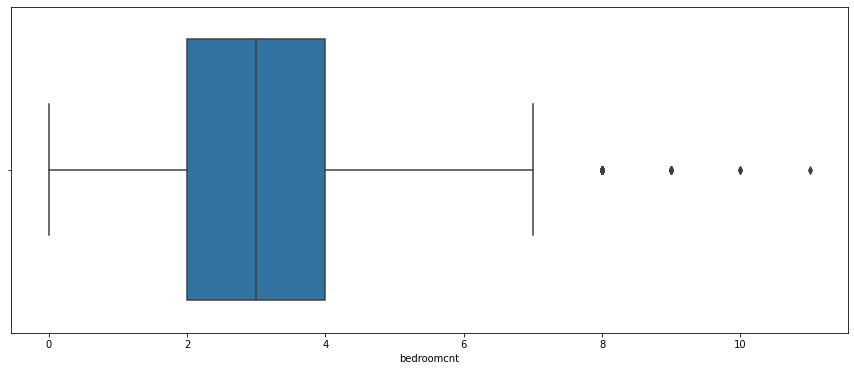

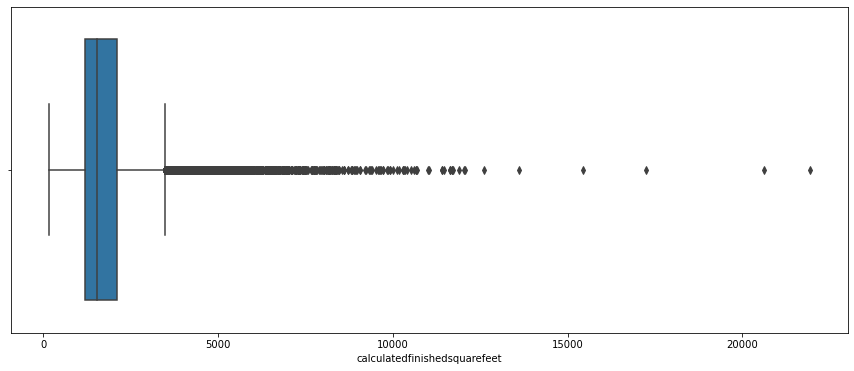

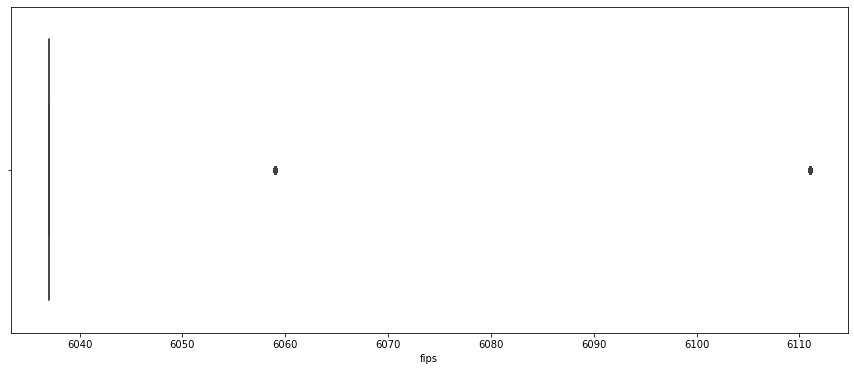

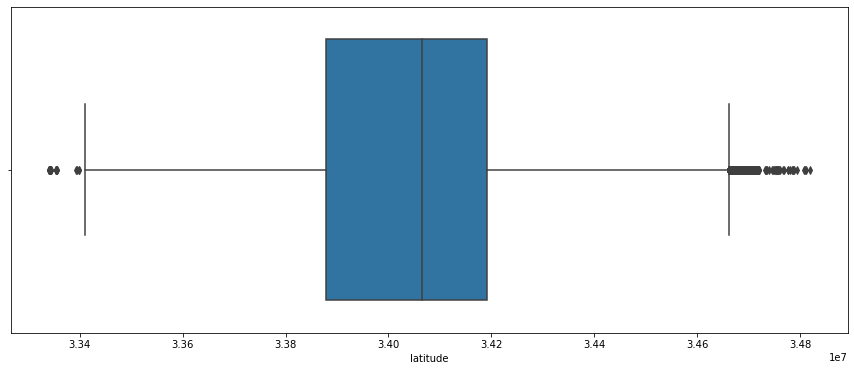

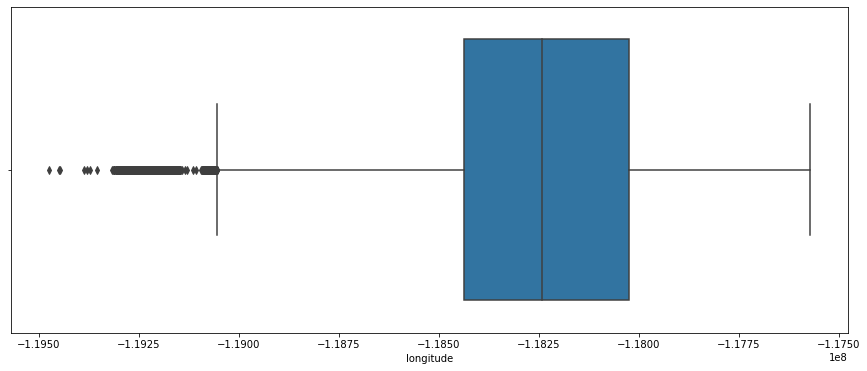

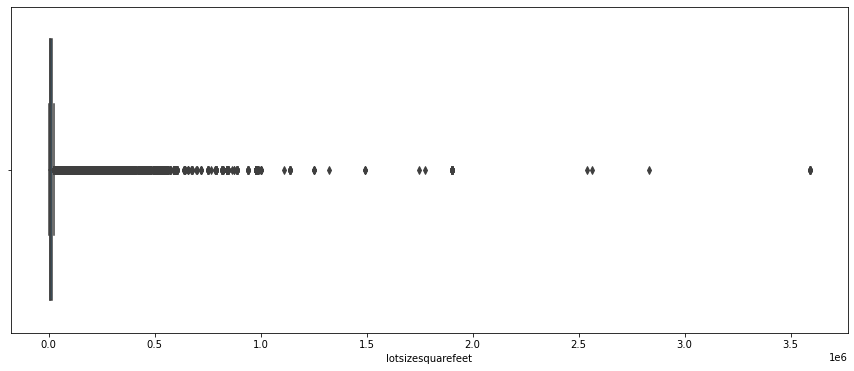

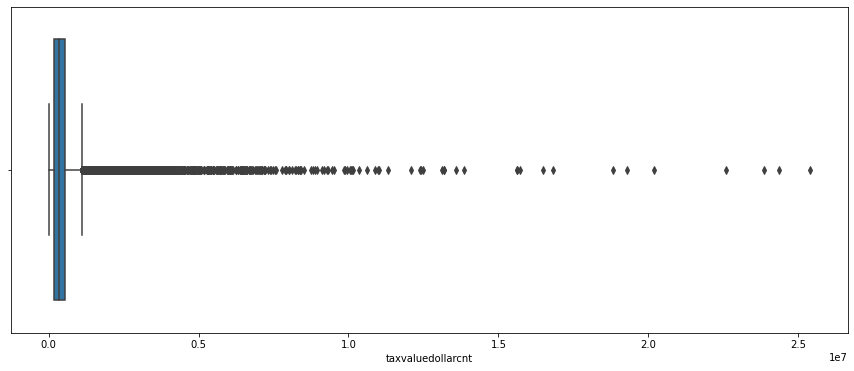

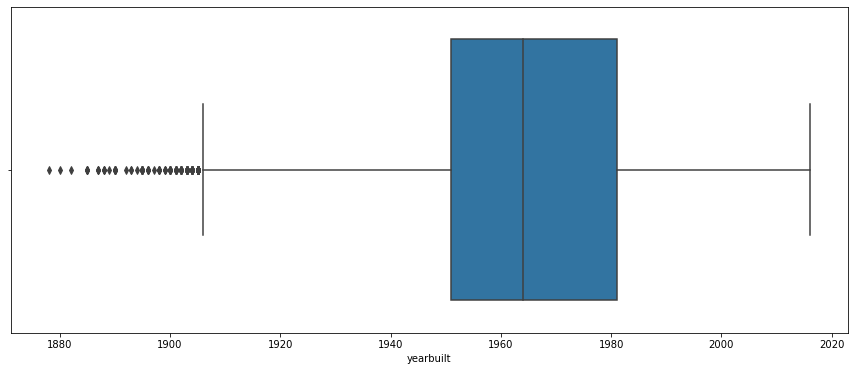

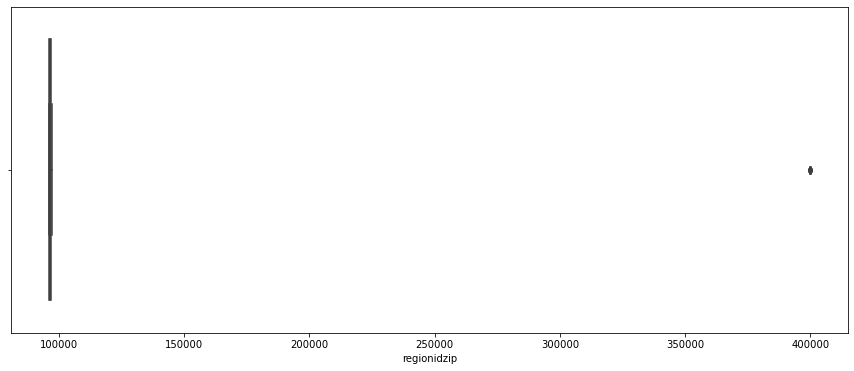

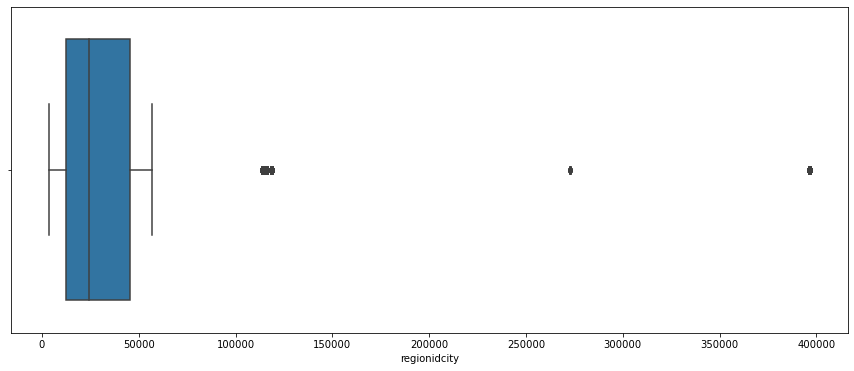

In [14]:
# visualizing columns to identify outliers
for column in ['heatingorsystemtypeid', 'bathroomcnt',
       'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet',
        'taxvaluedollarcnt','yearbuilt','regionidzip','regionidcity']:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=column, data=df)
    plt.show()

In [15]:
df[df.taxvaluedollarcnt < 3000000]

,heatingorsystemtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror
1,0.0,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,0.055619
2,0.0,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,0.005383
3,2.0,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,-0.103410
4,2.0,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,12447.0,96451.0,1964.0,119407.0,0.006940
5,0.0,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,51239.0,97091.0,1982.0,331064.0,-0.020526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71853,2.0,2.0,2.0,1286.0,6037.0,34245368.0,-118282383.0,47405.0,12447.0,96284.0,1940.0,354621.0,0.020615
71854,0.0,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,97116.0,1964.0,67205.0,0.013209
71855,2.0,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,96480.0,1954.0,49546.0,0.037129
71856,2.0,2.0,3.0,1762.0,6037.0,33937685.0,-117996709.0,6347.0,14634.0,96171.0,1955.0,522000.0,0.007204


### what is driving outliers?
### Takeaways and drivers of outliers in the data:
- bathroom count above 6
- bedroom count above 8 
- caluculatedfinishedsquarefeet over 4000
- taxvaluedollarcnt over 3,000,000
- the unit count should only = 1

***

In [16]:
# seperating columns into a features label so we can eliminate outliers
features = ['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet','yearbuilt','lotsizesquarefeet','lotsizesquarefeet']

In [17]:
k = 1.5 #common for it to always be 1.5
cols = features
def handle_outliers(df, cols, k):
    features = ['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet','yearbuilt','lotsizesquarefeet','lotsizesquarefeet']
    # Create placeholder dictionary for each columns bounds
    bounds_dict = {}
    for col in cols:
        # get necessary iqr values
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr

        #store values in a dictionary referencable by the column name
        #and specific bound
        bounds_dict[col] = {}
        bounds_dict[col]['upper_bound'] = upper_bound
        bounds_dict[col]['lower_bound'] = lower_bound

    for col in cols:
        #retrieve bounds
        col_upper_bound = bounds_dict[col]['upper_bound']
        col_lower_bound = bounds_dict[col]['lower_bound']

        #remove rows with an outlier in that column
        df = df[(df[col] < col_upper_bound) & (df[col] > col_lower_bound)]
        
    return df

In [18]:
df = wrangle.handle_outliers(df, cols, k)
df

,heatingorsystemtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror
1,0.0,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,0.055619
2,0.0,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,0.005383
3,2.0,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,-0.103410
5,0.0,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,51239.0,97091.0,1982.0,331064.0,-0.020526
7,0.0,1.0,2.0,738.0,6037.0,34149214.0,-118239357.0,4214.0,45457.0,96325.0,1922.0,218552.0,0.101723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71851,2.0,2.0,4.0,1633.0,6037.0,33870815.0,-118070858.0,4630.0,30267.0,96204.0,1962.0,346534.0,0.001082
71854,0.0,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,97116.0,1964.0,67205.0,0.013209
71855,2.0,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,96480.0,1954.0,49546.0,0.037129
71856,2.0,2.0,3.0,1762.0,6037.0,33937685.0,-117996709.0,6347.0,14634.0,96171.0,1955.0,522000.0,0.007204


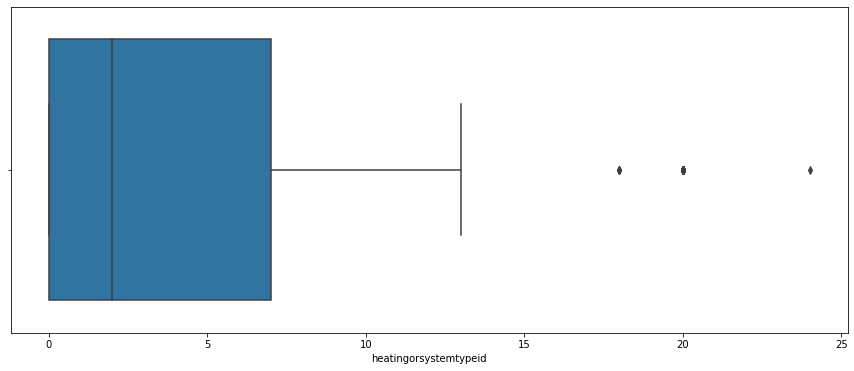

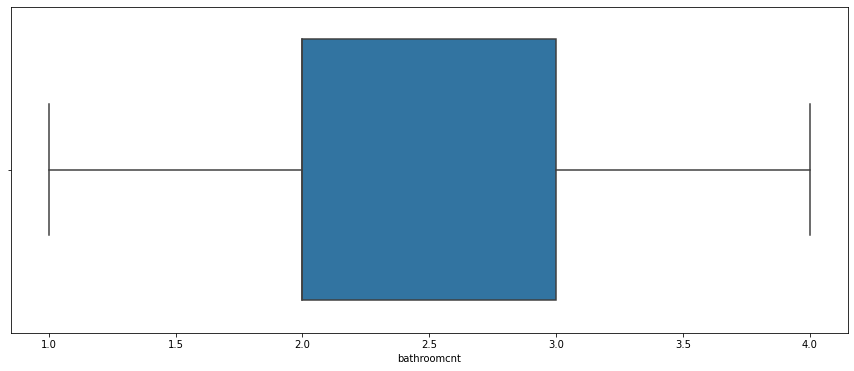

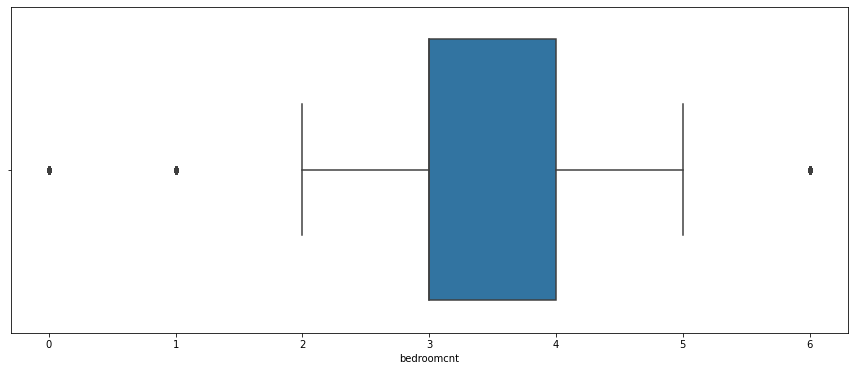

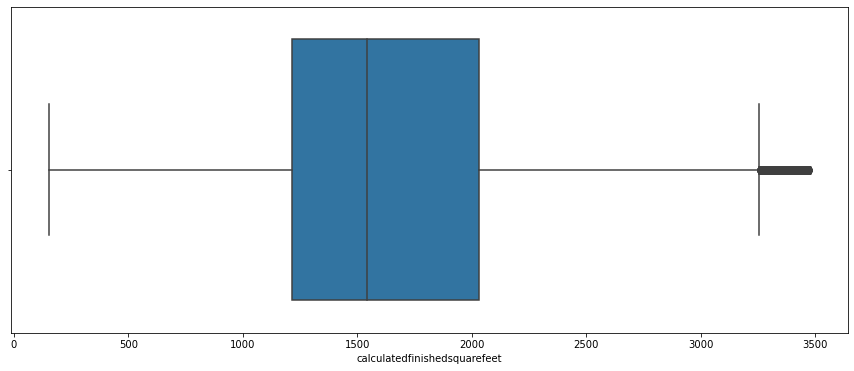

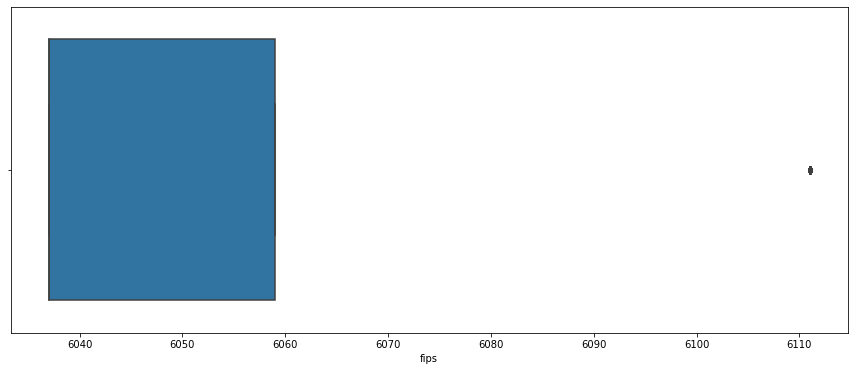

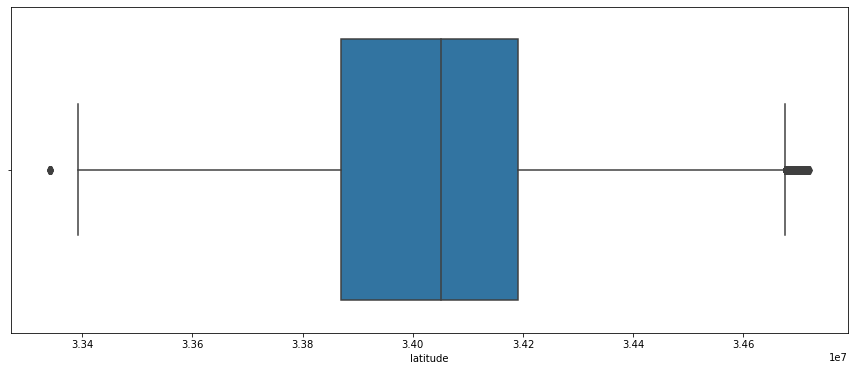

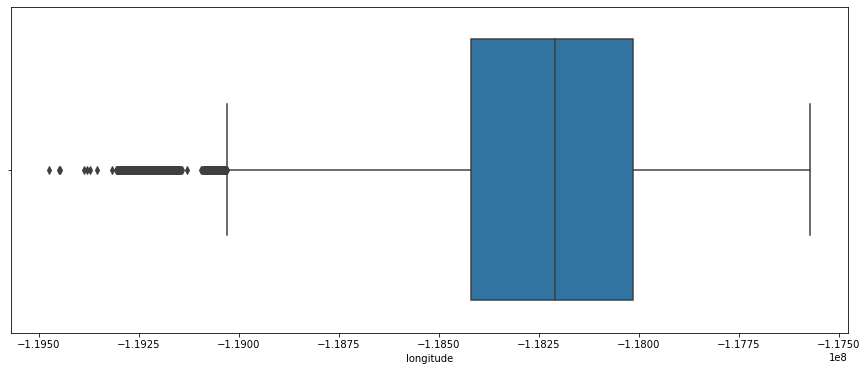

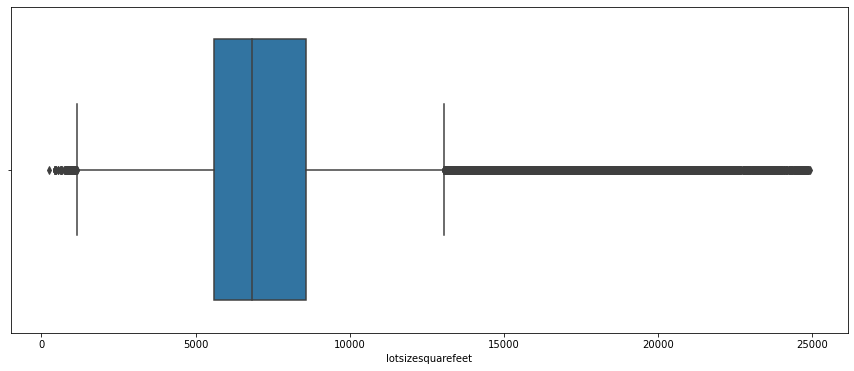

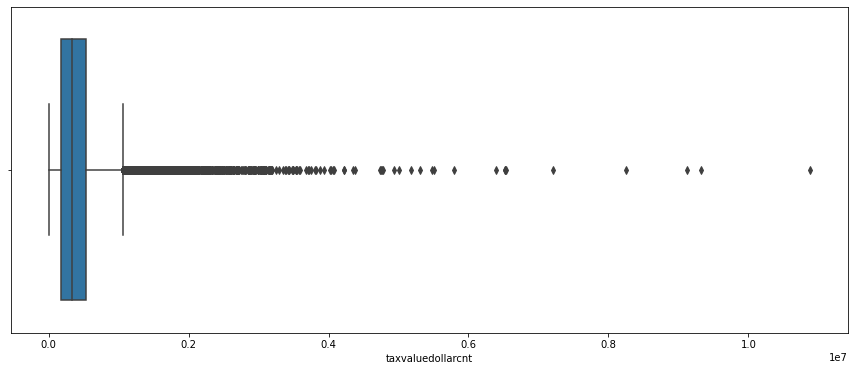

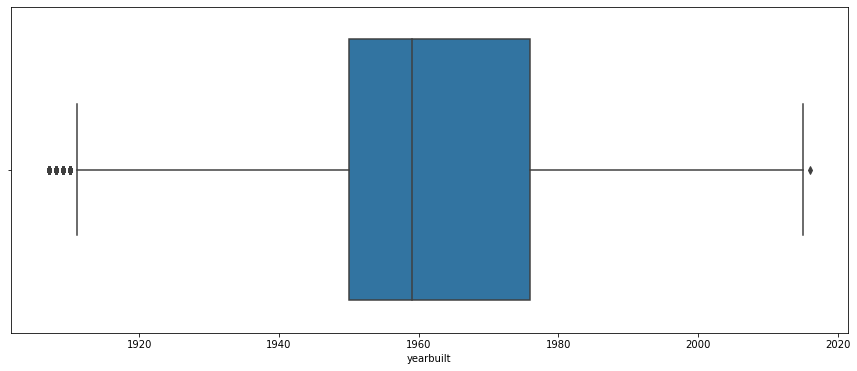

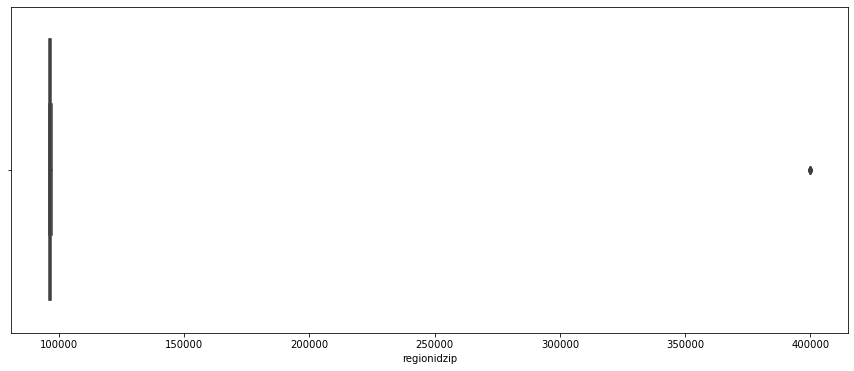

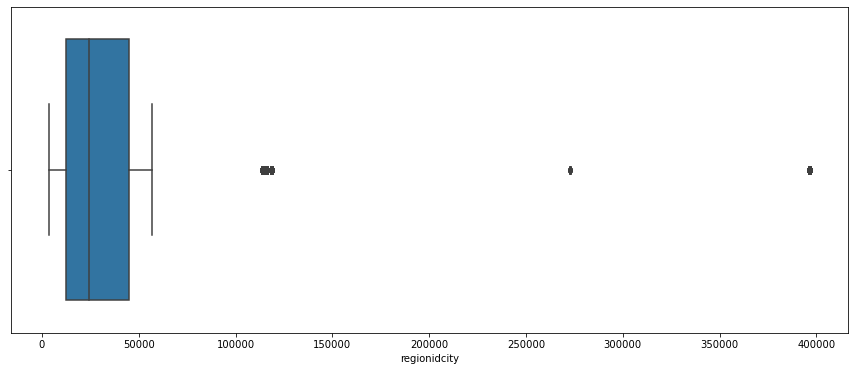

In [19]:
# visualizing columns to identify outliers
for column in ['heatingorsystemtypeid', 'bathroomcnt',
       'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet',
        'taxvaluedollarcnt','yearbuilt','regionidzip','regionidcity']:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=column, data=df)
    plt.show()

### Takeaways:
- after using the outlier funtion we have concluded to:
    - 38529 rows and 13 columns

***

# <span style="color:blue">Split Data</span>

In [35]:
def split(df):
    train_and_validate, test = train_test_split(df, random_state=13, test_size=.15)
    train, validate = train_test_split(train and validate, random_state=13, test_size=.2)
    print('Train: %d rows, %d cols' % train.shape)
    print ('Validate: %d rows, %d cols' % validate. shape)
    print ('Test: %d rows, %d cols' % test.shape)
    train, validate, test = split(df)
    return train, validate, test

In [38]:
train, validate, test = split(df)

UnboundLocalError: local variable 'train' referenced before assignment

In [23]:
train

NameError: name 'train' is not defined

In [ ]:
train

In [ ]:
train = wrangle.get_exploration_data(df)

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [ ]:
sns.boxplot(data = train, x = train.bathroomcnt)
train.bathroomcnt.value_counts()

In [ ]:
sns.boxplot(data = train, x = train.bedroomcnt)
train.bedroomcnt.value_counts()

In [ ]:
sns.boxplot(data = train, x = train.taxvaluedollarcnt)
(train.taxvaluedollarcnt > 2500000).count()

In [ ]:
sns.boxplot(data = train, x = train.calculatedfinishedsquarefeet)
train.calculatedfinishedsquarefeet.value_counts()

In [ ]:
sns.boxplot(data = train, x = train.unitcnt)
train.unitcnt.value_counts()

In [ ]:
train = wrangle.set_limits(train)
train

In [ ]:
train.describe()

In [ ]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [ ]:
train.logerror.describe()

In [ ]:
train.taxvaluedollarcnt.describe()

In [ ]:
#bin taxvaluecounts into bins

train['taxvaluedollarcnt_bin'] = pd.cut(train.taxvaluedollarcnt, [0, 500000, 1000000, 1500000,2000000, 3000000])


In [ ]:
# Declaring the points for first line plot
X1 = train.bedroomcnt 
Y1 = train.fips
# plotting the first plot
plt.plot(X1, Y1, label = "plot 1") 
# Declaring the points for second line plot
X2 = train.bathroomcnt 
Y2 = train.fips
# plotting the second plot 
plt.plot(X2, Y2, label = "plot 2") 
  
# Labeling the X-axis 
plt.xlabel('X-axis') 
# Labeling the Y-axis 
plt.ylabel('Y-axis') 
# Give a title to the graph
plt.title('Two plots on the same graph') 
  
# Show a legend on the plot 
plt.legend() 
 
plt.show()

In [ ]:
train.head()
